In [115]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import  MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, f1_score,jaccard_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import model_selection,metrics
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense

from src.models.predict_model import modelfit

%matplotlib inline

monster_df = pd.read_csv('../data/processed/Monster_modeling_df.csv')

monster_df.drop(columns={"Unnamed: 0", "Monster Name", "Size",'Type','Alignment'},axis=1, inplace=True)
monster_df.head()



,Traits,Reactions,Armor Class,Hit Points,Challenge,Proficiency Bonus,STR,DEX,CON,INT,...,chaotic good,chaotic neutral,lawful evil,lawful good,lawful neutral,neutral,neutral evil,neutral good,unaligned,total_stats
0,1,0,19,207,15.0,5,23,12,21,18,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,106
1,1,0,19,243,16.0,5,27,10,25,16,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,112
2,1,0,18,200,13.0,5,22,10,22,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86
3,1,0,15,90,5.0,3,14,20,14,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,70
4,0,0,12,19,0.5,2,16,14,14,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,69


In [4]:
#Input Variables: Size, Type, Environment, Alignment, CR(disguised as 4x player level)
#Output Variables: Stats, Saving Throws, Traits(barebones), Attack Bonus, Damage per Round, Reactions (y/n), Legendary Actions (y/n)

LinearRegression (and related)
KNeighborsRegressor
DecisionTreeRegressor
RandomForestRegressor (and related)

In [5]:
monster_df.columns

Index(['Traits', 'Reactions', 'Armor Class', 'Hit Points', 'Challenge',
       'Proficiency Bonus', 'STR', 'DEX', 'CON', 'INT', 'WIS', 'CHA',
       'Legendary Actions', 'Attack_Bonus', 'Spell_Bonus', 'Spell_Save_DC',
       'WIS_SV', 'INT_SV', 'CHA_SV', 'STR_SV', 'DEX_SV', 'CON_SV', 'Arctic',
       'Coastal', 'Desert', 'Forest', 'Grassland', 'Hill', 'Mountain', 'NA',
       'Swamp', 'Underdark', 'Underwater', 'Urban', 'Average_Damage_per_Round',
       'Damage Resistances', 'Damage Immunities', 'Condition Immunities',
       'Damage Vulnerabilities', 'Spellcaster', 'Magic Resistance',
       'Legendary Resistance', 'Regeneration', 'Undead Fortitude',
       'Pack Tactics', 'Damage Transfer', 'Angelic Weapons', 'Charge',
       'size_ordinal', 'aberration', 'beast', 'celestial', 'construct',
       'dragon', 'elemental', 'fey', 'fiend', 'giant', 'humanoid',
       'monstrosity', 'ooze', 'plant', 'swarm', 'undead', 'any alignment',
       'any chaotic alignment', 'any evil alignment', 

## MultOutput Machine Learning
Classic machine learning fails here since it generally maps multiple inputs to a single output. We could run independent regressions, predict each variable one at a time. This ignores correlations in the outputs however, so it isn't optimal.

We will try two methods: Random Forests with multioutput regressor and using Tensorflow Keras API

In [99]:
## Train Test Split

X = monster_df[['Coastal','Arctic','Desert','Forest','Grassland', 'Hill', 'Mountain', 'NA', 'Swamp', 'Underdark','Underwater', 'Urban','size_ordinal', 'aberration', 'beast',
       'celestial', 'construct', 'dragon', 'elemental', 'fey', 'fiend',
       'giant', 'humanoid', 'monstrosity', 'ooze', 'plant', 'swarm', 'undead',
       'any alignment', 'any chaotic alignment', 'any evil alignment',
       'any non-good alignment', 'any non-lawful alignment', 'chaotic evil',
       'chaotic good', 'chaotic neutral', 'lawful evil', 'lawful good',
       'lawful neutral', 'neutral', 'neutral evil', 'neutral good',
       'unaligned','Challenge']]

Y = monster_df[['Hit Points','Armor Class','Proficiency Bonus','STR','DEX','CON','WIS','INT','CHA', 'STR_SV','DEX_SV','CON_SV','WIS_SV','INT_SV','CHA_SV', 'Attack_Bonus','Average_Damage_per_Round','Legendary Actions', 'Damage Resistances',
       'Damage Immunities', 'Condition Immunities', 'Damage Vulnerabilities',
       'Legendary Resistance', 'Magic Resistance']]


feature_list = X.columns
target_list = Y.columns

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)




## Linear Regression for Multioutput Regression

In [42]:
model = (LinearRegression())
model.fit(x_train, y_train)
print("Training Score: ", model.score(x_train, y_train))
print("Testing Score: ",model.score(x_test, y_test))
yhat_l = model.predict(x_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, yhat_l))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, yhat_l))
scores = cross_val_score(model,X,Y,cv=5)
print(scores.mean())

Training Score:  0.7137115581392551
Testing Score:  0.6056351821451139
Mean squared error: 50.46
Coefficient of determination: 0.61
0.5317739480983121


## k-Nearest Neighbors for Multioutput Regression

In [102]:
model_k = MultiOutputRegressor(KNeighborsRegressor())
model_k.fit(x_train, y_train)
print("Training Score: ", model_k.score(x_train, y_train))
print("Testing Score: ",model_k.score(x_test, y_test))
yhat_k = model_k.predict(x_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, yhat_k))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, yhat_k))
scores = cross_val_score(model_k,X,Y,cv=5)
print(scores.mean())


Training Score:  0.6909416913834311
Testing Score:  0.587280629588338
Mean squared error: 31.44
Coefficient of determination: 0.59
0.49103829885942335


## Multi Output Gradiant Boosting Regressor

In [78]:
model_g = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=75))
model_g.fit(x_train, y_train)
print("Training Score: ", model_g.score(x_train, y_train))
print("Testing Score: ",model_g.score(x_test, y_test))
yhat_g = model_g.predict(x_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, yhat_g))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, yhat_g))
scores = cross_val_score(model_g,X,Y,cv=5)
print(scores.mean())

Training Score:  0.8879351314524625
Testing Score:  0.6777330262984057
Mean squared error: 22.39
Coefficient of determination: 0.68
0.628387705619894


## Random Forest Regression

In [27]:
n_est = 50
max_depth = 15
model_R = RandomForestRegressor(n_estimators = n_est,max_depth = max_depth, random_state=0)
model_R.fit(x_train, y_train)
print("Training Score: ", model_R.score(x_train, y_train))
print("Testing Score: ",model_R.score(x_test, y_test))
yhat_r = model_R.predict(x_test)

baseline_MSE = mean_squared_error(y_test, yhat_r)
baseline_r2 = r2_score(y_test, yhat_r)

print("Mean squared error: %.2f" % baseline_MSE)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % baseline_r2)


Training Score:  0.9289202202575485
Testing Score:  0.650152992955183
Mean squared error: 23.14
Coefficient of determination: 0.65


## More info onRandom Forest Regressor


In [108]:
## Feature Importance
feature_list = X.columns
# Get numerical feature importances
importances = list(model_R.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


Variable: Challenge            Importance: 0.87
Variable: size_ordinal         Importance: 0.07
Variable: lawful good          Importance: 0.01
Variable: Coastal              Importance: 0.0
Variable: Arctic               Importance: 0.0
Variable: Desert               Importance: 0.0
Variable: Forest               Importance: 0.0
Variable: Grassland            Importance: 0.0
Variable: Hill                 Importance: 0.0
Variable: Mountain             Importance: 0.0
Variable: NA                   Importance: 0.0
Variable: Swamp                Importance: 0.0
Variable: Underdark            Importance: 0.0
Variable: Underwater           Importance: 0.0
Variable: Urban                Importance: 0.0
Variable: aberration           Importance: 0.0
Variable: beast                Importance: 0.0
Variable: celestial            Importance: 0.0
Variable: construct            Importance: 0.0
Variable: dragon               Importance: 0.0
Variable: elemental            Importance: 0.0
Variable: 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

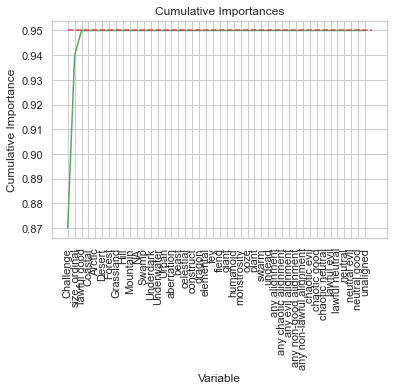

In [109]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(feature_list, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(feature_list, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [110]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

IndexError: index 0 is out of bounds for axis 0 with size 0

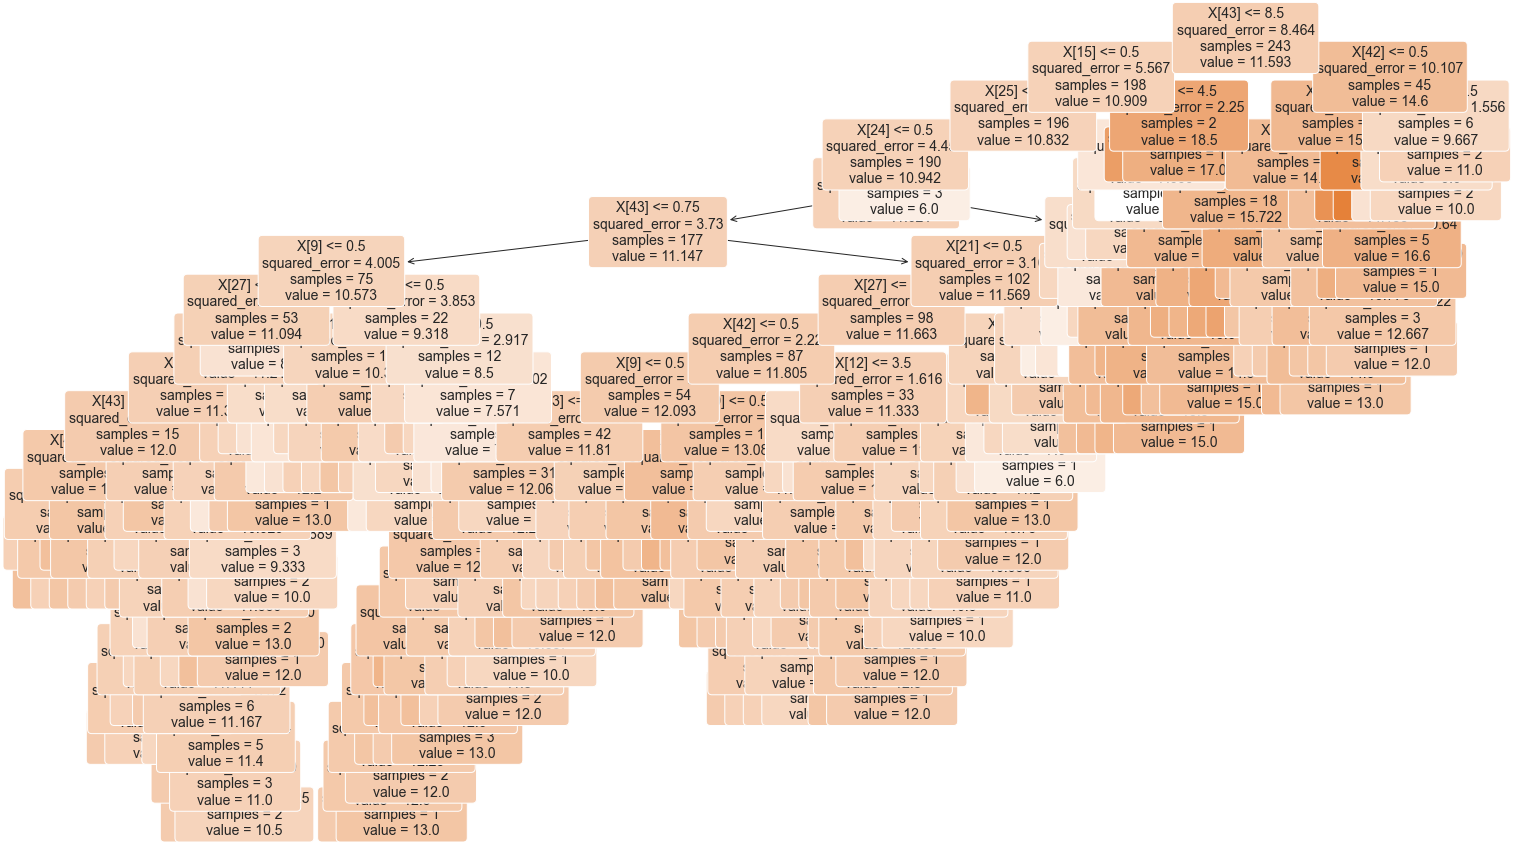

In [111]:
import pydot
# Pull out one tree from the forest
Tree = model_D.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);


## Baseline TensorFlow model Keras
evaluate the MLP model using repeated -fold cV with 10 folds and 3 repeats

In [122]:
from sklearn.datasets import make_regression
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=3, random_state=2)
	return X, y
 
X_1, y_1 = get_dataset()

In [126]:
print(y_1)

[[-148.03723474  -80.63209848  -91.5736561 ]
 [ -82.27272654  -54.35420936 -114.40357938]
 [-160.04683144 -112.6928605   -78.47448648]
 ...
 [ -57.06470093   -3.65337026    5.37879727]
 [ -84.15214472  -28.85380227  -24.39982153]
 [ -28.32501715   35.58057957   93.02173732]]


In [113]:
def get_model(n_inputs, n_outputs):
    model_tf = Sequential()
    model_tf.add(Dense(20, input_dim = n_inputs, kernel_initializer = 'he_uniform', activation = 'relu'))
    model_tf.add(Dense(n_outputs))
    model_tf.compile(loss='mae', optimizer='adam')
    return model_tf

In [118]:
def evaluate_model(X,y):
    results = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    #define evaluation procedure
    cv = RepeatedKFold(n_splits = 10, n_repeats=3, random_state=1)
    #enumerate folds
    for train_ix, test_ix in cv.split(X):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        #define model
        model = get_model(n_inputs, n_outputs)
        #fit
        model.fit(X_train, y_train, verbose=0, epochs =100)
        #evaluate
        mae = model.evaluate(X_test, y_test, verbose=0)
        #store
        print('>%.3f' % mae)
        results.append(mae)
    return results

In [129]:
results = evaluate_model(X_1,y_1)
print('MAE: %.3f (%.3f)' % (mean(results), std(results)))

>7.759
>7.688
>6.819
>7.185
>8.768
>7.843
>8.366
>8.163
>8.740
>7.358
>10.756
>7.563
>9.446
>6.750
>8.432
>9.444
>8.245
>9.760
>6.984
>6.993
>8.147
>7.732
>8.158
>8.501
>7.588
>8.888
>7.593
>8.422
>8.285
>6.607


MAE: 8.099 (0.936)
